Original: [[1, 1], [4, 1], [2.5, 4]]
Translation: [[-1, -4], [2, -4], [0.5, -1]]
Scaling: [[3, 3], [12, 3], [7.5, 12]]
Rotate: [[-1.0, 1.0], [-1.0, 4.0], [-4.0, 2.5]]


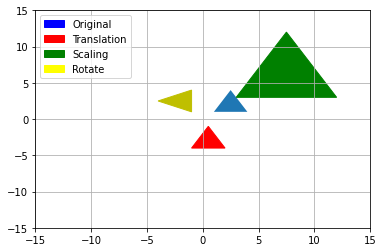

In [0]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatchesp
import math


def translation(points, tx, ty):
  new_points = []
  for x, y in points:
    new_points.append([round(x+tx, 2), round(y+ty, 2)])
  print(f'Translation: {new_points}')
  return new_points


def scaling(points, sx, sy):
  new_points = []
  for x, y in points:
    new_points.append([round(x*sx, 2), round(y*sy, 2)])
  print(f'Scaling: {new_points}')
  return new_points


def rotate(points, angle):
  new_points = []
  for x, y in points:
    xi = round(x*math.cos(angle) - y*math.sin(angle), 2)
    yi = round(y*math.cos(angle) + x*math.sin(angle), 2)
    new_points.append([xi, yi])
  print(f'Rotate: {new_points}')
  return new_points


plano = 15
ax = plt.axes(xlim=(-plano, plano), ylim=(-plano, plano))
plt.grid()

points = [[1, 1],
          [4, 1],
          [2.5, 4]
         ]
print(f'Original: {points}')
poly = plt.Polygon(points)
ax.add_patch(poly)

trans = plt.Polygon(translation(points, -2, -5), color='r')
scal = plt.Polygon(scaling(points, 3, 3), color='g')
rot = plt.Polygon(rotate(points, math.pi/2), color='y')

plt.legend(handles=[mpatches.Patch(color='blue', label='Original'),
                    mpatches.Patch(color='red', label='Translation'),
                    mpatches.Patch(color='Green', label='Scaling'),
                    mpatches.Patch(color='Yellow', label='Rotate')])

ax.add_patch(trans)
ax.add_patch(scal)
ax.add_patch(rot)
plt.show()


Pontos Iniciais
[10, 16] - [0, 1]
Rotação: True
[16, 10] - [1, 0]
Inversão de caminho: True
[1, 0] - [16, 10]
[(10, 16), (9, 15), (9, 14), (8, 13), (7, 12), (7, 11), (6, 10), (5, 9), (5, 8), (4, 7), (3, 6), (3, 5), (2, 4), (1, 3), (1, 2), (0, 1)]


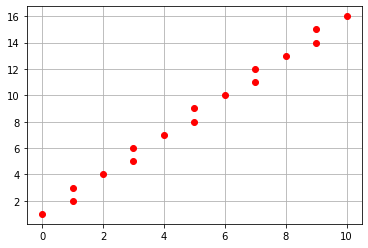

In [0]:
from matplotlib import pyplot as plt

def get_line(x1, y1, x2, y2):
  print('Pontos Iniciais')
  print(f'[{x1}, {y1}] - [{x2}, {y2}]')
  dx = x2 - x1
  dy = y2 - y1

  is_steep = abs(dy) > abs(dx)
  print(f'Rotação: {is_steep}')
  if is_steep:
    x1, y1 = y1, x1
    x2, y2 = y2, x2
    print(f'[{x1}, {y1}] - [{x2}, {y2}]')

  swapped = x1 > x2
  print(f'Inversão de caminho: {swapped}')
  if swapped:
    x1, x2 = x2, x1
    y1, y2 = y2, y1
    print(f'[{x1}, {y1}] - [{x2}, {y2}]')
  
  dx = x2 - x1
  dy = y2 - y1

  error = int(dx/2)
  ystep = 1 if y1 < y2 else -1

  y = y1
  points = []
  for x in range(x1, x2 + 1):
    coord = (y, x) if is_steep else (x, y)
    points.append(coord)
    error -= abs(dy)
    
    if error < 0:
      y += ystep
      error += dx


  if swapped:
    points.reverse()
  print(points)
  return points


x1, y1 = 10, 16
x2, y2 = 0, 1
plt.grid()

points = get_line(x1, y1, x2, y2)
for p in points:
  plt.plot(p[0], p[1], 'ro')
plt.show()

Original: 
[3, 3, 3]
[1, 5, 5]
[7, 2, 2]
Result
[-3  3  3]
[-5  1  5]
[-2  7  2]


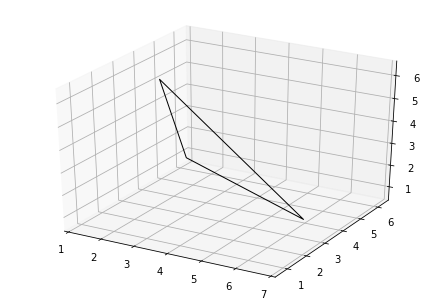

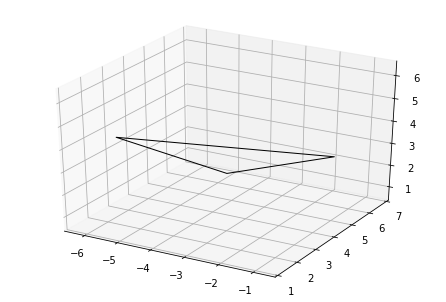

In [0]:
# Angulos de Euler
%pip install pyny3d
import numpy as np
import pyny3d.geoms as pyny
import math

def euler(points, angle, axis):
  p = np.array(points)
  if axis.lower() == 'x':
    matrix = np.array([[1, 0, 0],
                      [0, int(math.cos(angle)), int(math.sin(angle))],
                      [0, int(-math.sin(angle)), int(math.cos(angle))]])
  elif axis.lower() == 'y':
    matrix = np.array([[int(math.cos(angle)), 0, int(-math.sin(angle))],
                       [0, 1, 0],
                       [int(math.sin(angle)), 0, int(math.cos(angle))]])
  elif axis.lower() == 'z':
    matrix = np.array([[int(math.cos(angle)), int(math.sin(angle)), 0],
                       [int(-math.sin(angle)), int(math.cos(angle)), 0],
                       [0, 0, 1]])
  print(np.matmul(p, matrix))
  return np.matmul(p, matrix)

def create_new_polygon(points, angle, axis):
  p1, p2, p3 = points

  return np.array([
                  euler(p1, angle, axis),
                  euler(p2, angle, axis),
                  euler(p3, angle, axis)
                  ])

# p1 = np.array([0, 0, 0])
# p2 = np.array([7, 0, 0])
# p3 = np.array([7, 10, 2])
p1 = [3, 3, 3]
p2 = [1, 5, 5]
p3 = [7, 2, 2]
print(f'Original: \n{p1}\n{p2}\n{p3}')
angle = math.pi/2
axis = 'z'

polygon = np.array([p1, p2, p3])
pyny.Polygon.verify = False
pol = pyny.Polygon(polygon)
pol.plot()

print('Result')
new_polygon = create_new_polygon([p1, p2, p3], angle, axis)
new_pol = pyny.Polygon(new_polygon)
new_pol.plot()